## Two class Classification

###  *Building a Logistic Regression Classifier for binary classes (rejected & accepted)*

In [ ]:
#Bringing necessary libraries
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn.metrics import classification_report

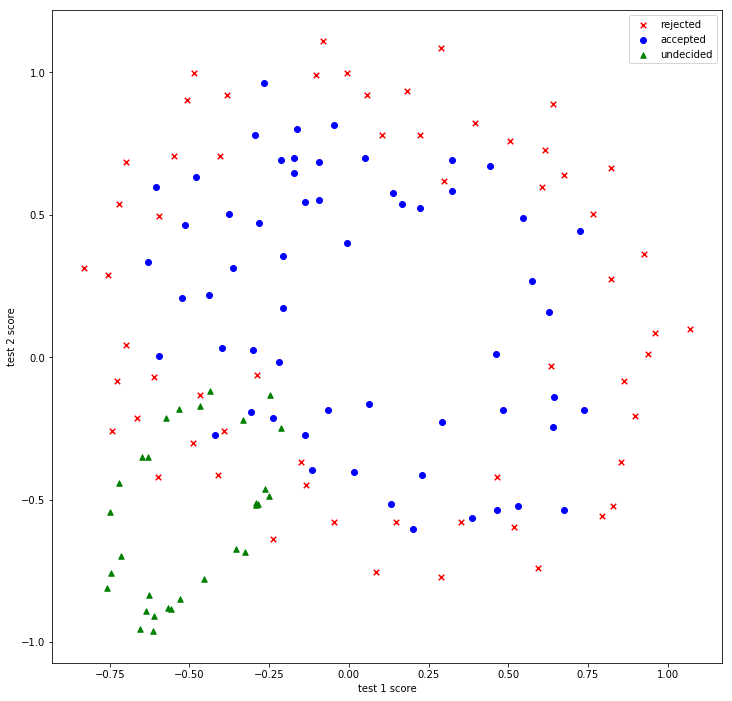

In [143]:
#Reading and splitting data
data = np.loadtxt('data/microchip3.txt', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)
color = ['red', 'blue', 'green']
plt.figure(figsize = (12, 12))
plt.xlabel('test 1 score')
plt.ylabel('test 2 score')
plt.scatter(x[y==0,0], x[y==0,1], c=color[0], marker='x', s=30)
plt.scatter(x[y==1,0], x[y==1,1], c=color[1])
plt.scatter(x[y==2,0], x[y==2,1], c=color[2], marker='^', s=30)
plt.legend(('rejected', 'accepted', 'undecided'))
plt.show()

np.random.seed(2018)
train = np.random.choice([True, False], x.shape[0], replace=True, p=[0.6, 0.4])

x_train, y_train = x[train, :], y[train] #train set for multiclass
x_test, y_test = x[~train, :], y[~train] #test set for multiclass

x2_train, y2_train = x[np.logical_and(train, y<2),:], y[np.logical_and(train, y<2)] #train for only rejected and accepted
x2_test, y2_test = x[np.logical_and(~train, y<2),:], y[np.logical_and(~train, y<2)] #test for only rejected and accepted

In [144]:
#Print first 5 rows of data and unique values of response variable
print(data[:5])
print(np.unique(data[:,2],return_counts=True))

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]
(array([0., 1., 2.]), array([60, 58, 30], dtype=int64))


In [145]:
#Looking at the shape of each split
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)
print('\nx2_train shape',x2_train.shape)
print('y2_train shape',y2_train.shape)
print('x2_test shape',x2_test.shape)
print('y2_test shape',y2_test.shape)

x_train shape (88, 2)
y_train shape (88,)
x_test shape (60, 2)
y_test shape (60,)

x2_train shape (73, 2)
y2_train shape (73,)
x2_test shape (45, 2)
y2_test shape (45,)


#### *Building a logistic regression classifier for binary classes(rejected & accepted)*

In [146]:
#Running logistic regression model with C=10
from sklearn import linear_model
logit = linear_model.LogisticRegression(C=10) 

logit.fit(x2_train,y2_train)
y2_train_pred = logit.predict(x2_train)
y2_test_pred = logit.predict(x2_test)
print('Accuracy for training data at C=10 is %f' % (metrics.accuracy_score(y2_train, y2_train_pred)))
print('Accuracy for test data at C=10 is %f' % (metrics.accuracy_score(y2_test, y2_test_pred)))
print("\033[m"+'Model complexity:', np.sqrt(np.square(logit.coef_[0][0]) + np.square(logit.coef_[0][1])))
print("\033[1m"+"Score of the Logistic Regression Model: %.2f" %logit.score(x2_test,y2_test))

Accuracy for training data at C=10 is 0.520548
Accuracy for test data at C=10 is 0.311111
Model complexity: 0.7267357922908929
Score of the Logistic Regression Model: 0.31


In [147]:
#Confusion Matrix, Precision and Recall for Logistic Regression
CM_logit=metrics.confusion_matrix(y2_test, y2_test_pred)
precision_logit = metrics.precision_score(y2_test, y2_test_pred)
recall_logit = metrics.recall_score(y2_test, y2_test_pred)
F1_logit = metrics.f1_score(y2_test, y2_test_pred)
#print("Confusion Matrix:\n",CM_logit)

#Install pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2
#Install pip install PTable
from prettytable import PrettyTable
table=PrettyTable(title="\033[1m"+"Confusion Matrix")

table.field_names=["\033[m"+"","Predicted Class=0", "Predicted Class=1"]
table.add_row(["Actual Class=0",CM_logit[0,0],CM_logit[0,1]])
table.add_row(["-----------------","-----------------","-----------------"])
table.add_row(["Actual Class=1", CM_logit[1,0],CM_logit[1,1]])
print(table,"\n")
print("\033[1m"+"Precision: %.2f"%precision_logit)
print("\nRecall: %.2f"%recall_logit)
print("\nF1-score: %.2f"%F1_logit)

+-----------------------------------------------------------+
|                      Confusion Matrix                     |
+-------------------+-------------------+-------------------+
|                   | Predicted Class=0 | Predicted Class=1 |
+-------------------+-------------------+-------------------+
|   Actual Class=0  |         11        |         7         |
| ----------------- | ----------------- | ----------------- |
|   Actual Class=1  |         24        |         3         |
+-------------------+-------------------+-------------------+ 

Precision: 0.30

Recall: 0.11

F1-score: 0.16


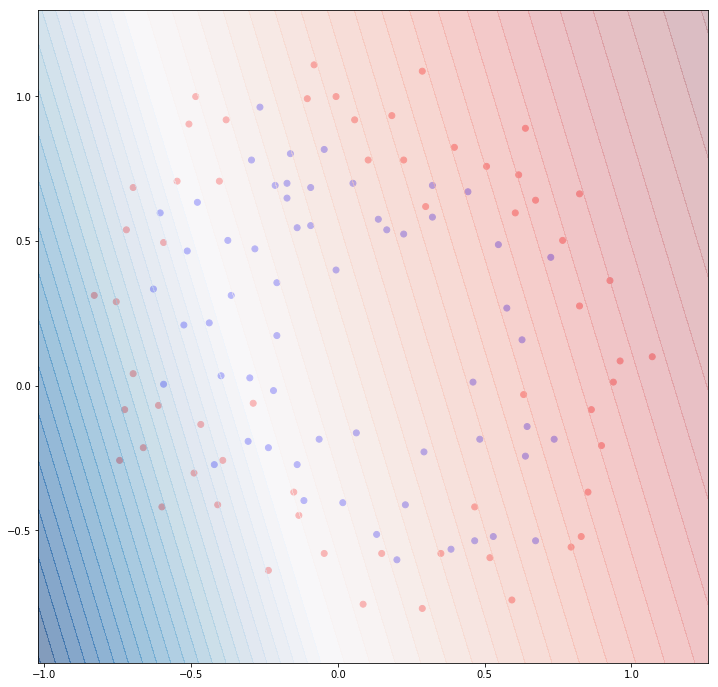

In [148]:
#Plotting Logistic Regression
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200
x2 = x[y<2,]
y2 = y[y<2,]
x0 = my_linspace(min(x2[:,0]), max(x2[:,0]), steps)
x1 = my_linspace(min(x2[:,1]), max(x2[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]


mesh_proba = logit.predict_proba(mesh_data).reshape(steps, steps, 2)
mesh_data.shape

color = ['red', 'blue']
y2_color = [color[i] for i in y2]

contour_color = [plt.cm.Reds, plt.cm.Blues]
plt.figure(figsize=(12, 12))
plt.scatter(x2[:,0], x2[:,1], c=y2_color)
for i in range(2):
    plt.contourf(xx0, xx1, np.maximum(mesh_proba[:,:,i], 0.5), 20, cmap=contour_color[i], alpha=0.5)
plt.show()

###  *Building a Gaussian Navie Bayes Classifier for binary classes (rejected & accepted)*

In [149]:
#Building Naive Bayes Classifier
gnb = naive_bayes.GaussianNB()
gnb.fit(x2_train, y2_train)
y2_train_n_pred = gnb.predict(x2_train)
y2_test_n_pred = gnb.predict(x2_test)
print('Accuracy for training data is %f' % (metrics.accuracy_score(y2_train, y2_train_n_pred)))
print('Accuracy for test data is %f' % (metrics.accuracy_score(y2_test, y2_test_n_pred)))
print("\033[1m"+"Score of the Gaussian Naive Bayes Model: %.2f" %gnb.score(x2_test,y2_test))

Accuracy for training data is 0.753425
Accuracy for test data is 0.688889
Score of the Gaussian Naive Bayes Model: 0.69


In [150]:
#Confusion Matrix, Precision and Recall for Gaussian Naive Bayes
CM_gnb=metrics.confusion_matrix(y2_test, y2_test_n_pred)
precision_gnb = metrics.precision_score(y2_test, y2_test_n_pred)
recall_gnb = metrics.recall_score(y2_test, y2_test_n_pred)
F1_gnb = metrics.f1_score(y2_test, y2_test_n_pred)
#print("Confusin Matrix:\n",CM_gnb)


from prettytable import PrettyTable
table=PrettyTable(title="\033[1m"+"Confusion Matrix")

table.field_names=["\033[m"+"","Predicted Class=0", "Predicted Class=1"]
table.add_row(["Actual Class=0",CM_gnb[0,0],CM_gnb[0,1]])
table.add_row(["-----------------","-----------------","-----------------"])
table.add_row(["Actual Class=1", CM_gnb[1,0],CM_gnb[1,1]])
print(table,"\n")

print("\033[1m"+"Precision: %.2f"%precision_gnb)
print("\nRecall: %.2f"%recall_gnb)
print("\nF1-score: %.2f"%F1_gnb)

+-----------------------------------------------------------+
|                      Confusion Matrix                     |
+-------------------+-------------------+-------------------+
|                   | Predicted Class=0 | Predicted Class=1 |
+-------------------+-------------------+-------------------+
|   Actual Class=0  |         14        |         4         |
| ----------------- | ----------------- | ----------------- |
|   Actual Class=1  |         10        |         17        |
+-------------------+-------------------+-------------------+ 

Precision: 0.81

Recall: 0.63

F1-score: 0.71


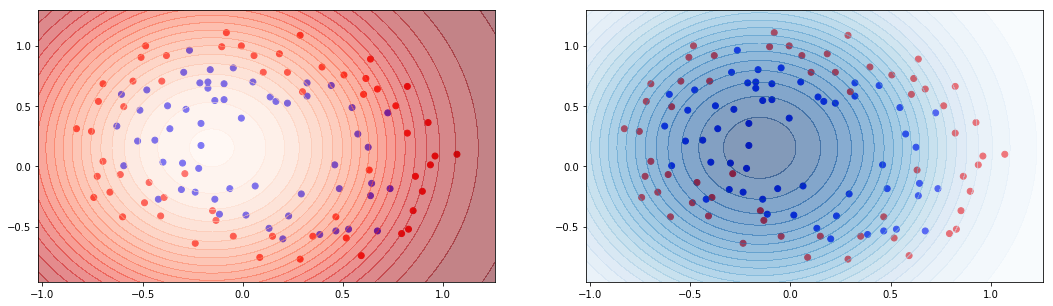

In [151]:
#Plotting Gaussian Naive Bayes
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200
x2 = x[y<2,]
y2 = y[y<2,]
x0 = my_linspace(min(x2[:,0]), max(x2[:,0]), steps)
x1 = my_linspace(min(x2[:,1]), max(x2[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]


mesh_proba = gnb.predict_proba(mesh_data).reshape(steps, steps, 2)
mesh_data.shape

color = ['red', 'blue']
y2_color = [color[i] for i in y2]

contour_color = [plt.cm.Reds, plt.cm.Blues]
plt.figure(figsize=(18, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.scatter(x2[:,0], x2[:,1], c=y2_color)
    plt.contourf(xx0, xx1, mesh_proba[:,:,i], 20, cmap=contour_color[i], alpha=0.5)
plt.show()

In [152]:
#Comparison of Logistic Regression(LR) and Gaussian Naive Bayes(GNB) results
from prettytable import PrettyTable
table=PrettyTable(title="\033[1m"+"                  Logistic Regression            VS            Gaussian Naive Bayes")

table.field_names=["","\033[91m"+"LR-Predicted Class=0", "LR-Predicted Class=1","\033[92m"+"GNB-Predicted Class=0","GNB-Predicted Class=1"]
table.add_row(["\033[m"+"Actual Class=0",CM_logit[0,0],CM_logit[0,1],CM_gnb[0,0],CM_gnb[0,1]])
table.add_row(["-----------------","-----------------","-----------------","-----------------","-----------------"])
table.add_row(["Actual Class=1",CM_logit[1,0],CM_logit[1,1],CM_gnb[1,0],CM_gnb[1,1]])
print(table,"\n")
print("\033[91m"+"Precision of LR: %.2f"%precision_logit, "\033[92m"+"\nPrecision of GNB: %.2f"%precision_gnb )
print("\033[91m"+"\nRecall of LR: %.2f"%recall_logit, "\033[92m"+"\nRecall of GNB: %.2f"%recall_gnb)
print("\033[91m"+"\nF1-score of LR: %.2f"%F1_logit,"\033[92m"+"\nF1-score of GNB: %.2f"%F1_gnb)
print("\033[91m"+"\nScore of the LR model: %.2f"%logit.score(x2_test,y2_test),"\033[92m"+"\nScore of the GNB model: %.2f" %gnb.score(x2_test,y2_test))

+-----------------------------------------------------------------------------------------------------------------+
|                                 Logistic Regression            VS            Gaussian Naive Bayes               |
+-------------------+----------------------+----------------------+-----------------------+-----------------------+
|                   | LR-Predicted Class=0 | LR-Predicted Class=1 | GNB-Predicted Class=0 | GNB-Predicted Class=1 |
+-------------------+----------------------+----------------------+-----------------------+-----------------------+
|   Actual Class=0  |          11          |          7           |           14          |           4           |
| ----------------- |  -----------------   |  -----------------   |   -----------------   |   -----------------   |
|   Actual Class=1  |          24          |          3           |           10          |           17          |
+-------------------+----------------------+----------------------+-----

In [153]:
#Correlation between independent variables
print(np.corrcoef(x2[:,0],x2[:,1]))

[[ 1.         -0.13870942]
 [-0.13870942  1.        ]]


### *Applying SVM kernel idea to Logistic Regression model*

In [154]:
#Building non-linear Logistic models with higher dimensions as in SVM
from sklearn import preprocessing

for i in range(5):
    polynomial = preprocessing.PolynomialFeatures(i+1)
    x_pol = polynomial.fit_transform(x) 
    x2_train_pol = x_pol[np.logical_and(train, y<2),:] 
    x2_test_pol = x_pol[np.logical_and(~train, y<2),:]
    logit_pol = linear_model.LogisticRegression(C=10)  
    logit_pol.fit(x2_train_pol,y2_train)
    y2_pred_pol = logit_pol.predict(x2_test_pol)
    print(i+1,'\033[1m-degree-polynomial model \033[91m Score:%.2f'%logit_pol.score(x2_test_pol,y2_test))
    print('                            Precision:%.2f'%metrics.precision_score(y2_test,y2_pred_pol))
    print('                            Recall:%.2f'%metrics.recall_score(y2_test,y2_pred_pol))
    print('                            F1-score:%.2f'%metrics.f1_score(y2_test,y2_pred_pol),"\n\033[m")
    print('\033[92m'+'Confusion Matrix:\n',metrics.confusion_matrix(y2_test,y2_pred_pol),'\033[m'+"\n")

1 -degree-polynomial model  Score:0.31
                            Precision:0.30
                            Recall:0.11
                            F1-score:0.16 

Confusion Matrix:
 [[11  7]
 [24  3]] 

2 -degree-polynomial model  Score:0.78
                            Precision:0.87
                            Recall:0.74
                            F1-score:0.80 

Confusion Matrix:
 [[15  3]
 [ 7 20]] 

3 -degree-polynomial model  Score:0.80
                            Precision:0.91
                            Recall:0.74
                            F1-score:0.82 

Confusion Matrix:
 [[16  2]
 [ 7 20]] 

4 -degree-polynomial model  Score:0.82
                            Precision:0.91
                            Recall:0.78
                            F1-score:0.84 

Confusion Matrix:
 [[16  2]
 [ 6 21]] 

5 -degree-polynomial model  Score:0.82
                            Precision:0.91
                            Recall:0.78
                            F1-score:0.84 

Confusion 

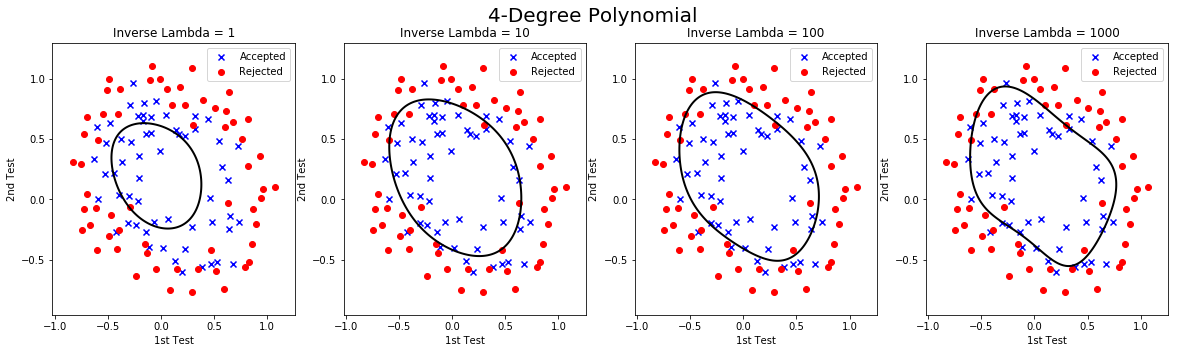

In [155]:
#Plotting Logistic Regression with polynomial 4-degree
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

polynom_4 = preprocessing.PolynomialFeatures(4)
x_poly4 = polynom_4.fit_transform(x)

x2_train_pol_4 = x_poly4[np.logical_and(train, y<2),:] 
x2_test_pol_4 = x_poly4[np.logical_and(~train, y<2),:]

x2_poly4 = polynom_4.fit_transform(x2)
fig_poly4 = plt.figure(figsize = (20, 5))
fig_poly4.suptitle('4-Degree Polynomial', fontsize=20)
C=[1, 10, 100, 1000]
for i in range(4):
    logit_pol4 = linear_model.LogisticRegression(C=C[i])   #Can adjust Lambda=1/C
    logit_pol4.fit(x2_train_pol_4, y2_train)
    
    plt.subplot(1,4,i+1)
    plt.scatter(x2_poly4[:, 1:3][y2 == 1, 0], x2_poly4[:,1:3][y2 ==1, 1], c='blue', marker='x', label="Accepted")
    plt.scatter(x2_poly4[:, 1:3][y2 == 0, 0], x2_poly4[:,1:3][y2 ==0, 1], c='red', marker='o', label="Rejected")
    
    steps = 200
    x0 = my_linspace(min(x2_poly4[:,1]), max(x2_poly4[:,1]), steps)
    x1 = my_linspace(min(x2_poly4[:,2]), max(x2_poly4[:,2]), steps)
    xx0, xx1 = np.meshgrid(x0, x1)
    mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
   
    mesh_deci = logit_pol4.decision_function(polynom_4.fit_transform(mesh_data)).reshape(xx0.shape)
    plt.contour(xx0, xx1, mesh_deci, [0.5], linewidths = 2, colors = 'black')
    plt.xlabel("1st Test")
    plt.ylabel("2nd Test")
    plt.legend(loc='upper right')
    title = ["Inverse Lambda = 1","Inverse Lambda = 10","Inverse Lambda = 100","Inverse Lambda = 1000"]
    plt.title(title[i])

## Three class Classification

### *Multi-class Logistic Regression model using Softmax function*

In [156]:
#Printing precision, recall and F1-score for original logistic regression
precision_logit = metrics.precision_score(y2_test, y2_test_pred)
recall_logit = metrics.recall_score(y2_test, y2_test_pred)
F1_logit = metrics.f1_score(y2_test, y2_test_pred) 
print("\033[1m"+"Precision: %.2f"%precision_logit)
print("\nRecall: %.2f"%recall_logit)
print("\nF1-score: %.2f"%F1_logit)

Precision: 0.30

Recall: 0.11

F1-score: 0.16


In [157]:
#Calculating F1-score for each label
class_0_f1_score = metrics.f1_score(y2_test, y2_test_pred,pos_label=0)
class_1_f1_score = metrics.f1_score(y2_test, y2_test_pred,pos_label=1)
CM_logit=metrics.confusion_matrix(y2_test, y2_test_pred)     
print("\033[1m"+'Class-0 F1-score: ',class_0_f1_score)
print('Class-1 F1-score: ',class_1_f1_score)
print(CM_logit)

#Calculating weighted F1-score manually
print("Weighted F1-score: %.2f"%(((np.sum(CM_logit[0])*class_0_f1_score)+(np.sum(CM_logit[1])*class_1_f1_score))/(np.sum(CM_logit))))
#Printing classification report
print ("\n\033[m"+classification_report(y2_test, y2_test_pred))

Class-0 F1-score:  0.41509433962264153
Class-1 F1-score:  0.16216216216216217
[[11  7]
 [24  3]]
Weighted F1-score: 0.26

             precision    recall  f1-score   support

          0       0.31      0.61      0.42        18
          1       0.30      0.11      0.16        27

avg / total       0.31      0.31      0.26        45



#### *Building a Multiclass Logistic Regression Model*

In [158]:
#Building a multi-class logistic regression model
multi_logit=linear_model.LogisticRegression(C=10, multi_class = 'multinomial', solver = 'newton-cg')
multi_logit.fit(x_train, y_train)

y_pred_m_train = multi_logit.predict(x_train)
y_pred_m_test = multi_logit.predict(x_test)

In [159]:
print (classification_report(y_test, y_pred_m_test))

CM_multi=metrics.confusion_matrix(y_test, y_pred_m_test)
precision_multi = metrics.precision_score(y_test, y_pred_m_test,average='weighted')
recall_multi = metrics.recall_score(y_test, y_pred_m_test,average='weighted')
F1_multi_logit = metrics.f1_score(y_test, y_pred_m_test,average='weighted') #f1-score weighted

#print("Confusion Matrix:\n",CM_multi)


from prettytable import PrettyTable
table=PrettyTable(title="\033[1m"+"Confusion Matrix")

table.field_names=["\033[m"+"","Predicted Class=0", "Predicted Class=1","Predicted Class=2"]
table.add_row(["Actual Class=0",CM_multi[0,0],CM_multi[0,1],CM_multi[0,2]])
table.add_row(["-----------------","-----------------","-----------------","-----------------"])
table.add_row(["Actual Class=1", CM_multi[1,0],CM_multi[1,1],CM_multi[1,2]])
table.add_row(["-----------------","-----------------","-----------------","-----------------"])
table.add_row(["Actual Class=2", CM_multi[2,0],CM_multi[2,1],CM_multi[2,2]])
print(table,"\n")

print("\033[1m"+"Precision: %.2f"%precision_multi)
print("\nRecall: %.2f"%recall_multi)
print("\nF1-score: %.2f"%F1_multi_logit)
print("\n\033[1m"+"Score of the Multiclass Logistic Regression Model: %.2f" %multi_logit.score(x_test,y_test))

             precision    recall  f1-score   support

          0       0.31      0.61      0.41        18
          1       0.33      0.11      0.17        27
          2       0.80      0.80      0.80        15

avg / total       0.44      0.43      0.40        60

+-------------------------------------------------------------------------------+
|                                Confusion Matrix                               |
+-------------------+-------------------+-------------------+-------------------+
|                   | Predicted Class=0 | Predicted Class=1 | Predicted Class=2 |
+-------------------+-------------------+-------------------+-------------------+
|   Actual Class=0  |         11        |         4         |         3         |
| ----------------- | ----------------- | ----------------- | ----------------- |
|   Actual Class=1  |         24        |         3         |         0         |
| ----------------- | ----------------- | ----------------- | --------------

Calculating manually <b>F1-score weighted</b>: 

##### [Support(cl-0)<b> x </b>F1-score(cl-0)<b> + </b>Support(cl-1)<b> x </b>F1-score(cl-1)<b> + </b>Support(cl-2)<b> x </b>F1-score(cl-2)]<b> / </b>(Support(cl-0) <b>+</b> Support(cl-1) <b>+</b> Support(cl-2))

In [160]:
F1_weighted = ((18*0.41) + (27*0.17) + (15*0.8)) / (18+27+15)
print("\033[1m"+'Weighted F1-score: %.2f'%F1_weighted )

Weighted F1-score: 0.40


Demonstrating <b>what if</b> F1-score was harmonic:
F1 = (2 x Recall x Precision)/(Recall + Precision)

In [161]:
F1_harmonic = (2*recall_multi*precision_multi)/(recall_multi+precision_multi)
print('F1_harmonic WOULD be indeed between Recall and Precision: ', F1_harmonic)
print("\033[1m"+'\nRecall< F1_harmonic <Precision\n')
print('   %.3f'%recall_multi,"<",'%.3f'%F1_harmonic,"<",'%.3f'%precision_multi)

F1_harmonic WOULD be indeed between Recall and Precision:  0.43746031746031744

Recall< F1_harmonic <Precision

   0.433 < 0.437 < 0.442


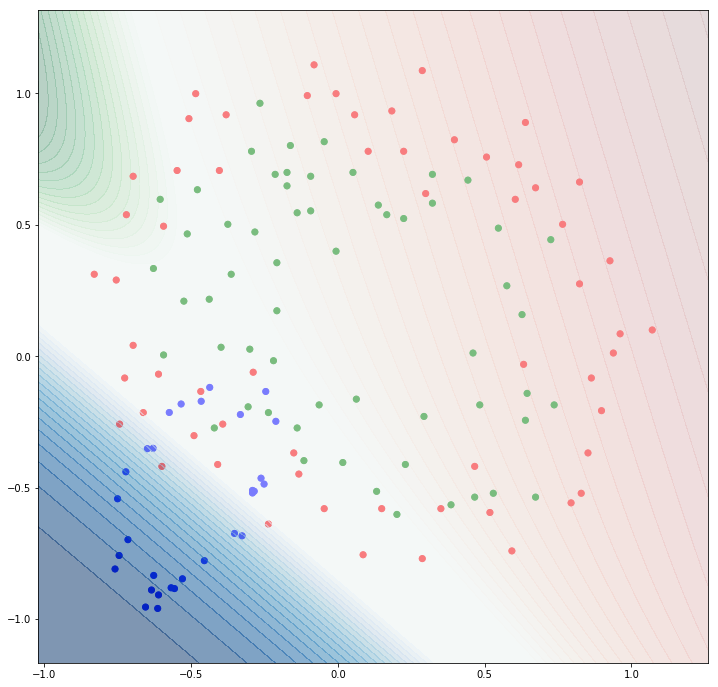

In [162]:
#Plotting a multiclass logistic regression model
def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_class = multi_logit.predict(mesh_data)
mesh_proba = multi_logit.predict_proba(mesh_data).reshape(steps, steps, 3)

color = ['red', 'green', 'blue']   
y_color = [color[i] for i in y]
plt.figure(figsize = (12, 12))
contour_color = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]
for i in range(3):
    plt.scatter(x[:,0], x[:,1], c=y_color)
    plt.contourf(xx0, xx1, np.maximum(mesh_proba[:,:,i],0.5), 20, cmap=contour_color[i], alpha=0.5)
plt.show()